In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Merged_data.csv


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the file path provided by your seniors
file_path = '/kaggle/input/dataset/Merged_data.csv'

# Load the data
df = pd.read_csv(file_path)

# Show the first 5 rows to make sure it loaded correctly
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,subreddit,permalink,score,num_comments,title,body_text,image_url
0,Medicine,https://old.reddit.com/r/medicine/comments/qzu...,8052,599,A detailed description of how you die from COV...,Good morning.\nI squeeze your hand.\n“It’s Fri...,NaN
1,Medicine,https://old.reddit.com/r/medicine/comments/fp2...,4956,356,3 Days of Inpatient Care in New York,NaN,NaN
2,Medicine,https://old.reddit.com/r/medicine/comments/kb3...,4808,132,Help! A doctor in my hometown was kidnapped by...,NaN,NaN
3,Medicine,https://old.reddit.com/r/medicine/comments/rqx...,4614,405,Powerless [Rant],NaN,NaN
4,Medicine,https://old.reddit.com/r/medicine/comments/fnz...,4421,335,"Dr. Usama Riaz has spent weeks screening, trea...",NaN,NaN


In [21]:
# Check for missing values
print("--- Missing Values ---")
print(df.isnull().sum())

# Check how many unique subreddits you have
print(f"\nTotal Subreddits: {df['subreddit'].nunique()}")

--- Missing Values ---
subreddit          0
permalink          0
score              0
num_comments       0
title              0
body_text       4018
image_url       3122
dtype: int64

Total Subreddits: 51


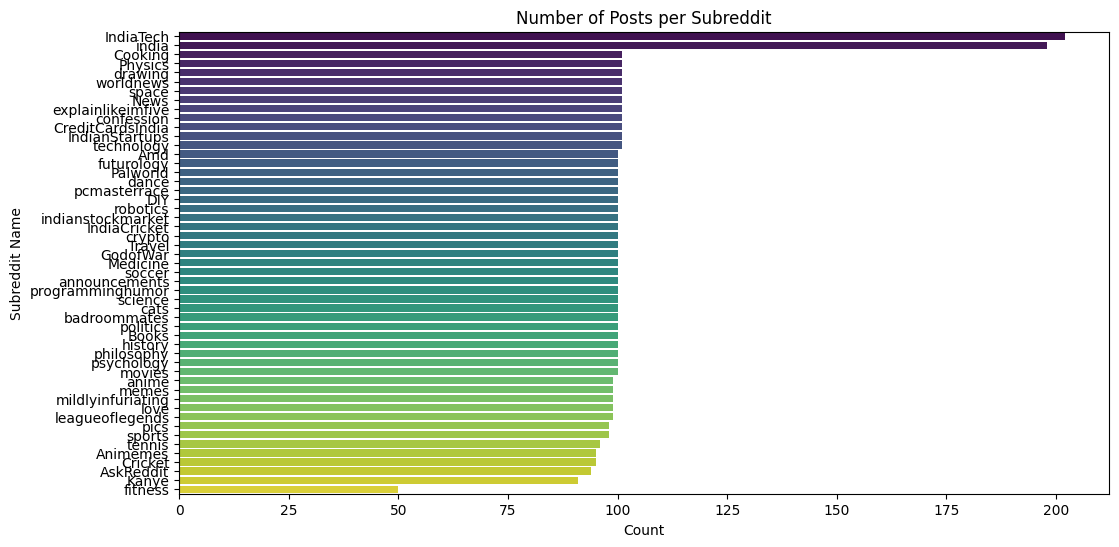

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='subreddit', order=df['subreddit'].value_counts().index, palette='viridis')
plt.title('Number of Posts per Subreddit')
plt.xlabel('Count')
plt.ylabel('Subreddit Name')

plt.savefig('my_plot_five.png')
plt.show()

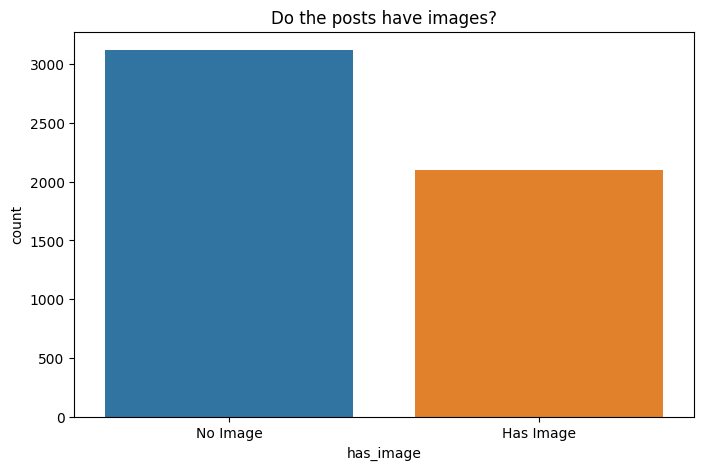

In [23]:
# Create flags for presence of text and images
df['has_image'] = df['image_url'].notna()
df['has_body'] = df['body_text'].notna()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='has_image', data=df)
plt.title('Do the posts have images?')
plt.xticks([0, 1], ['No Image', 'Has Image'])

plt.savefig('my_plot_four.png')
plt.show()

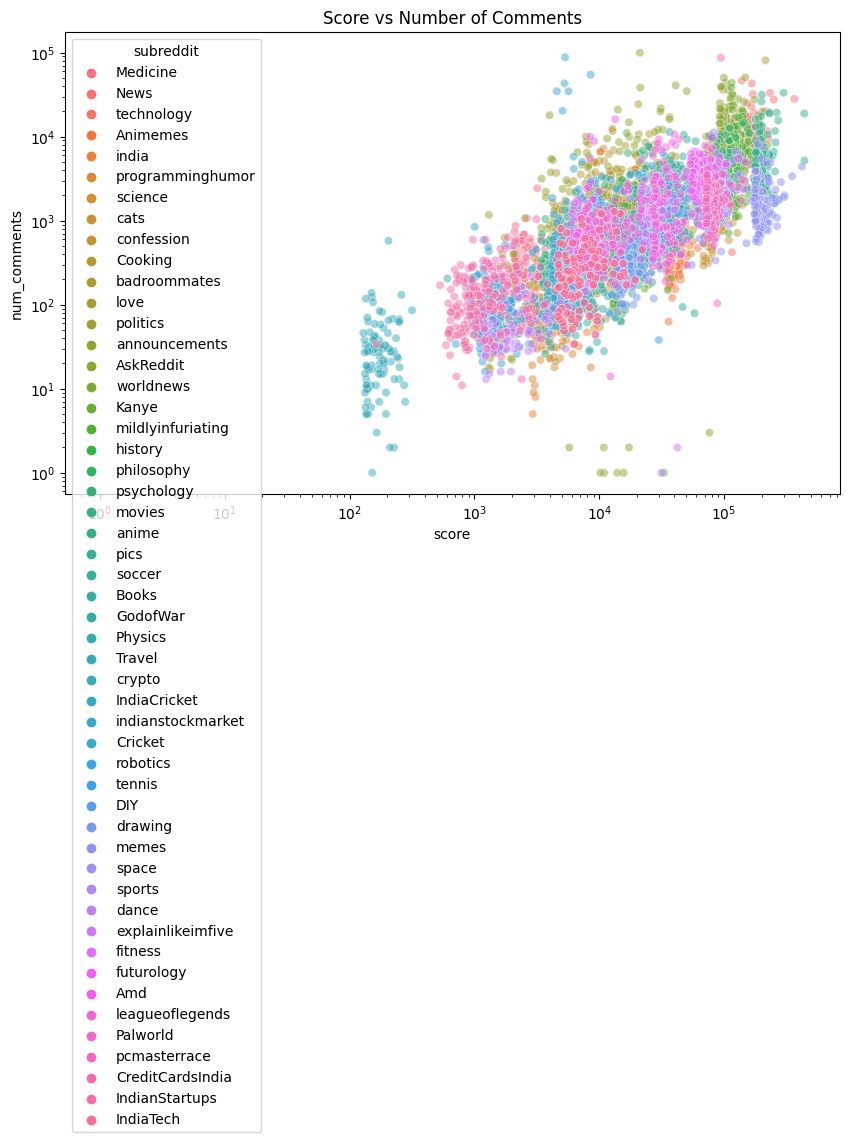

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score', y='num_comments', hue='subreddit', alpha=0.5)
plt.title('Score vs Number of Comments')
plt.xscale('log') # Using log scale because Reddit scores can vary wildly
plt.yscale('log')

plt.savefig('plot_3.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


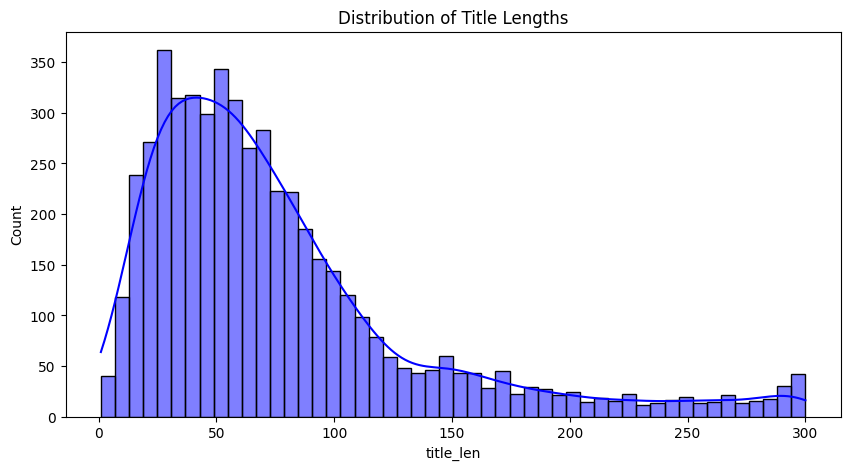

In [25]:
# Create a column for title length
df['title_len'] = df['title'].str.len()

plt.figure(figsize=(10, 5))
sns.histplot(df['title_len'], bins=50, kde=True, color='blue')
plt.title('Distribution of Title Lengths')

plt.savefig('plot_two.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


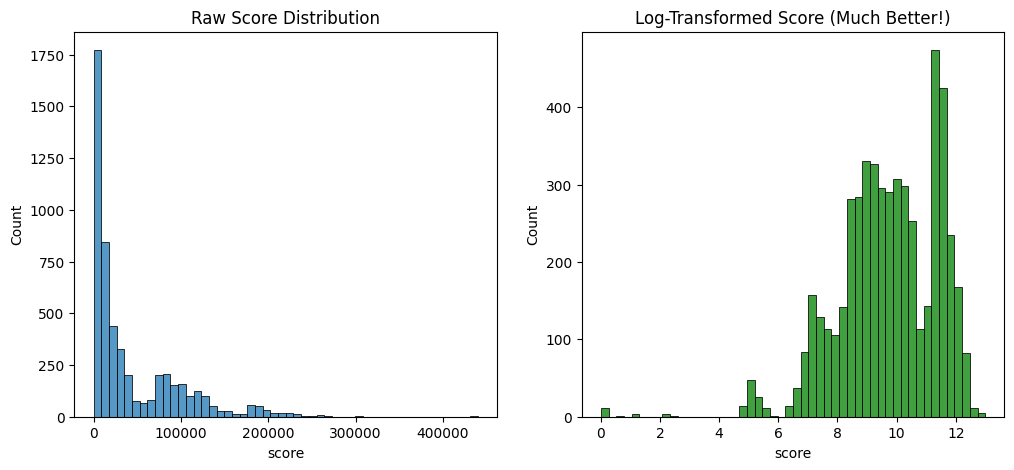

In [26]:
import numpy as np

# Plotting the raw score vs Log Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['score'], bins=50)
plt.title('Raw Score Distribution')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['score']), bins=50, color='green')
plt.title('Log-Transformed Score (Much Better!)')

plt.show()

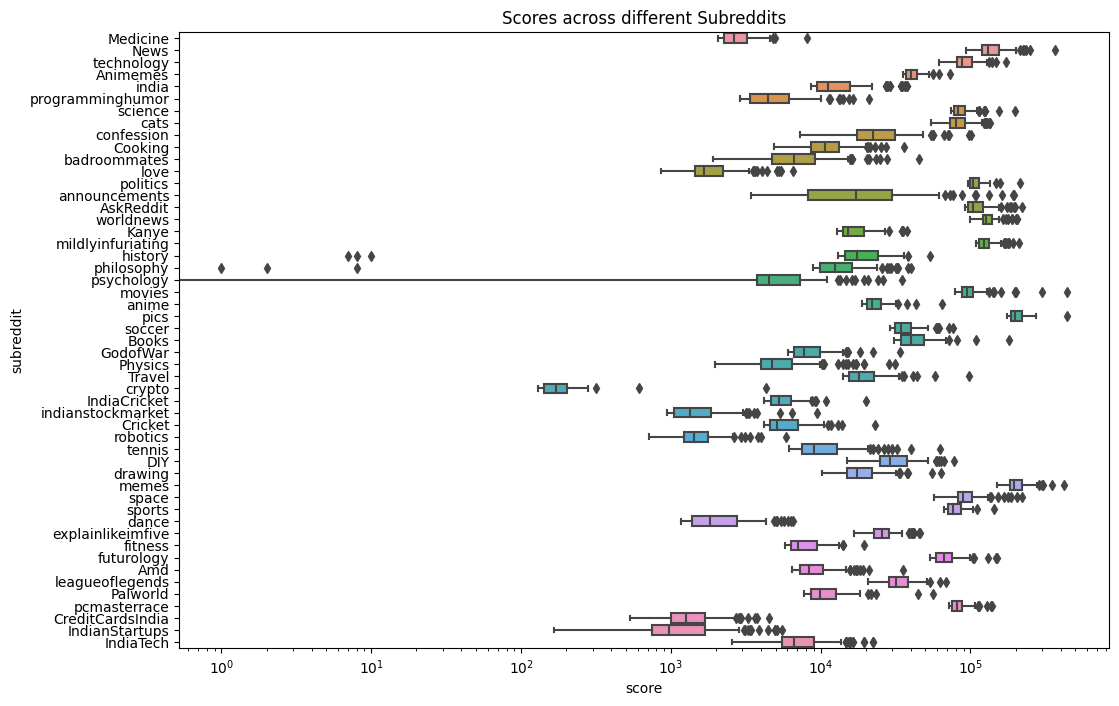

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='subreddit', x='score')
plt.xscale('log')
plt.title('Scores across different Subreddits')

plt.savefig('plot_one.png')
plt.show()